<a href="https://colab.research.google.com/github/chDouae/GradientDescent-r-gression-classification-/blob/main/Bienvenue_dans_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# Installer le SDK MistralAI (si pas déjà fait)
!pip install mistralai

# Imports
import os
from mistralai import Mistral  # C'est Mistral, pas Client
from mistralai.models import ImageURLChunk
from IPython.display import display, Markdown
import base64
from pathlib import Path
import json

# Stocker ta clé dans une variable d'environnement (une fois par session)
os.environ['MISTRAL_API_KEY'] = 'bclRXnk1PRrzrC0PkkV5ep7bWxlvv3yh'

# Initialiser le client avec la clé d'API récupérée depuis la variable d'environnement
client = Mistral(api_key=os.environ['MISTRAL_API_KEY'])

print("API MistralAI configurée avec succès.")


API MistralAI configurée avec succès.


In [87]:
from google.colab import files

uploaded = files.upload()
pdf_path = next(iter(uploaded.keys()))

print(f"Fichier uploadé : {pdf_path}")


Saving Douae_ML_New.pdf to Douae_ML_New (1).pdf
Fichier uploadé : Douae_ML_New (1).pdf


In [88]:
from pathlib import Path

pdf_path = Path(pdf_path)

try:
    print(f"Upload du fichier {pdf_path.name}...")
    uploaded_file = client.files.upload(
        file={
            "file_name": pdf_path.name,
            "content": pdf_path.read_bytes(),
        },
        purpose="ocr"
    )
    print("Upload réussi !")

    signed_url = client.files.get_signed_url(file_id=uploaded_file.id, expiry=1)
    print("URL signée obtenue:", signed_url.url)
except Exception as e:
    print("Erreur lors de l'upload :", e)


Upload du fichier Douae_ML_New (1).pdf...
Upload réussi !
URL signée obtenue: https://mistralaifilesapiprodswe.blob.core.windows.net/fine-tune/871c3670-51b3-4367-b589-d6e62a18d3a4/aa7f95cc-7ef0-4737-a739-d309758c6bdb/4d56806291924a3f81698967b2a94989.pdf?se=2025-07-24T00%3A50%3A27Z&sp=r&sv=2025-07-05&sr=b&sig=Tpgi3q/EMl36ob7ICsu%2BfzwhzkrPsIqQMrIwr31sSiQ%3D


{
    "pages": [
        {
            "index": 0,
            "markdown": "Machine learning\n\n|  Outcome | Machine learning  |\n| --- | --- |\n|  Supervise | Non Supervise  |\n|  Regression classification | Clustering  |\n|  Regression line | K-NN  |\n|  Regression Ridge | SVM  |\n|   | N/A  |\n|   | N/A  |\n|   | N/A  |\n|   | Rated  |\n|   | Resequ. de Heur.  |\n\nSupervise: a. Linear regression: it finds the best straight line that fits the data. the line it defined by the equation\n\n$$ \\frac{\\partial}{\\partial x} \\frac{\\partial}{\\partial y} = \\sin \\frac{\\delta}{2} \\quad \\text{intercept} $$\n\npredicted value (price of the base) input feature (ex. size of base)\n\nGoal: Minimize the error between the predicted values and the real values by minimizing the mean Squared Error (MSE)\n\nPour mesure d'erreur\n\n$$ MSE = \\frac{1}{m} S \\left( \\frac{\\text{real}}{\\text{predicted}} \\right) $$",
            "images": [],
            "dimensions": {
                "dpi": 200
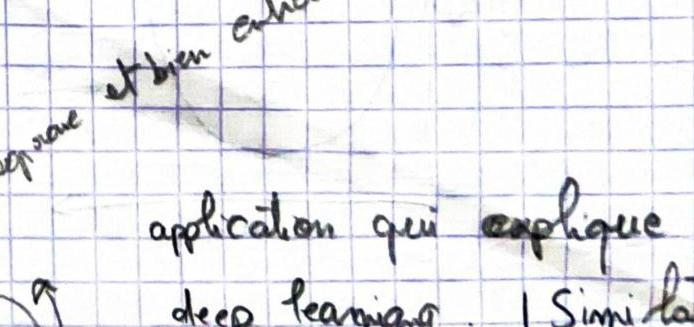

In [89]:
import time
import difflib
from mistralai import DocumentURLChunk
start_time = time.time()
pdf_response = client.ocr.process(
    document=DocumentURLChunk(document_url=signed_url.url),
    model="mistral-ocr-latest",
    include_image_base64=True
)
end_time = time.time()
execution_time = end_time - start_time

response_dict = json.loads(pdf_response.model_dump_json())
print(json.dumps(response_dict, indent=4, ensure_ascii=False))


In [90]:
from mistralai.models import OCRResponse
def replace_images_in_markdown(markdown_str: str, images_dict: dict) -> str:
    for img_name, base64_str in images_dict.items():
        markdown_str = markdown_str.replace(f"![{img_name}]({img_name})", f"![{img_name}]({base64_str})")
    return markdown_str

def get_combined_markdown(ocr_response: OCRResponse) -> str:
    markdowns = []
    for page in ocr_response.pages:
        image_data = {img.id: img.image_base64 for img in page.images}
        markdowns.append(replace_images_in_markdown(page.markdown, image_data))
    return "\n\n".join(markdowns)


Machine learning

|  Outcome | Machine learning  |
| --- | --- |
|  Supervise | Non Supervise  |
|  Regression classification | Clustering  |
|  Regression line | K-NN  |
|  Regression Ridge | SVM  |
|   | N/A  |
|   | N/A  |
|   | N/A  |
|   | Rated  |
|   | Resequ. de Heur.  |

Supervise: a. Linear regression: it finds the best straight line that fits the data. the line it defined by the equation

$$ \frac{\partial}{\partial x} \frac{\partial}{\partial y} = \sin \frac{\delta}{2} \quad \text{intercept} $$

predicted value (price of the base) input feature (ex. size of base)

Goal: Minimize the error between the predicted values and the real values by minimizing the mean Squared Error (MSE)

Pour mesure d'erreur

$$ MSE = \frac{1}{m} S \left( \frac{\text{real}}{\text{predicted}} \right) $$

# Logistic Regression

Utilise principalement pour résoudre des problèmes de classification linéaire (ou / Non, n / 0...)

## Exemple d'Utilisation

- Prédire si un client va acheter ou Non
- Prédire si un email est spam ou Non
- Détecter une maitie (présente ou Non)

Et tout autre problème binaire : traîner un corodel de Regression logistic

Machine Learning:

Machine Learning supervisisé
Les 24 Nations
(4) D ataset Features
Target x x x x
67
13

Tanget: decision.

Madele
$$f(x) = a(x) + b$$
(5) Le Madele et ses paramètres
(6) La plurien type de
madele: linece.
x en Madele

(7) Fonction de coût
on calcule les enjeux par
la fonction de coût
la différence entre la main maison de x et la prediction
on fait la somme de tous les erreurs
7144
a main
7144
a fonction de coût
a

(8) à équation N.L.: Pour minimiser la fonction de coût

ML supervise
1) - Regression linéaire (Estimation de valeur).
targets)
un feature $\rightarrow 1 \mathrm{~m}$
Les donnees sont a fane l'entrainement
apres le metayage de data on fait le Training
on devise les donnés
Data
Pour trouver les paramètre
a,b de fin)
Data training)
Data testing
et apries on fait- la validation
$\frac{72}{72}$
$\frac{72}{72}$
$\frac{72}{72}$
$\frac{72}{72} \rightarrow 30 \%$
$n^{2} \quad 4^{n}$
$n^{2} \quad 4^{n}$
et apries on fait- la valedalou
$\frac{72}{72} \rightarrow$
$\frac{72}{72}$ fane enher la donne $\rightarrow$ atrainennt paun $\rightarrow \frac{1}{2}$ eavoir a et b $\rightarrow$ prediction
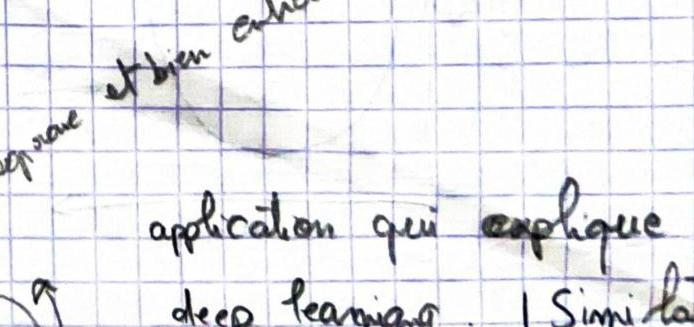

fonction de coût

$$
\Rightarrow J(a, b) = \frac{1}{20m} \sum_{i=n}^{\infty} (f(i) - y_i)^{2}
$$

production $\Rightarrow y(i)$

$$
f(i) = a + b
$$

- **Performance de Monteleon** (Meurée de accuracy)
- Coefficient de détermination pour mesurer la qualité de production

$$
PR^2 = 1 - \sum_{i=n}^{\infty} (y_i^2 - y_{i-1}^2) \text{ production}
$$

$$
\sum_{i=n}^{\infty} (y_i^2 - y_{i-1}^2) = \text{moyenne de y exacte}
$$

- Le coefficient doit être proche de 1 pour qu'il soit parfait 1 est parfait

- **Descente de gradient**
  Méthode pour trouver a et b qui minimisent J(a, b).

- Méthode de moindre course

$$
\frac{d(J(a, b))}{d(a, b)} \quad en peut par l'utiliser car on travaille avec plusieurs données et pour faire l'inverse de matrice ça nous prend plusieurs temps c pour cela on utilise l'algorithme de descente de gradient.

$$
\text{Dataset} \quad \sum_{i=n}^{\infty} \frac{y_i(m, a)}{y_i(m)} \quad \text{on a ajouter} \quad \sum_{i=n}^{\infty} \frac{y_i(m, c)}{y_i(m)} \quad \sum_{i=n}^{\infty} \frac{y_{i-1}(a)}{y_i(m)} \quad \sum_{i=n}^{\infty} \frac{1}{a}
$$

(2)- Gonerer un Datant $\left(x^{(i)}, y^{(i)}\right)$ avec $m$ exemples
(2) Donner à la machine un modele linéaire $F(X)=X .0$
(3) Calculer la fonction coût $=J(b)=\frac{1}{\operatorname{sen}} \frac{\partial y}{\partial t} \times \theta-y)^{2}$
(4) Calculer le gradient $\frac{d(J(\theta))}{d \theta}=\frac{1}{m} x^{T}(F(X)-Y)$ avec $x^{T}$ la matrice transpose de $x$
5- Utiliser P'algorithme de Gradient Descent cād

$$
\theta=\theta \cdot(a) \times \frac{d(J(\theta))}{d \theta}
$$

$$
\frac{d(J(\theta))}{d(\theta)}=\left(\begin{array}{c}
\frac{d(J(a, b)}{d a} \\
\frac{d(J(a, b))}{d b}
\end{array}\right) \text { son cherche à minimiser }
$$

Comment choisir $x$ :
Il faut ajuster les valeur et rester les cas
'en général $x=0,01$

$$
\left(\begin{array}{l}
x^{(a)} \\
x_{n}^{(a)}
\end{array}\right) \Rightarrow X^{\mathrm{T}}=\left[\begin{array}{l}
x_{n}^{(a)}, x_{n}^{(2)} \\
2,1, \cdots, 1
\end{array} \quad x_{n}^{(m)}\right]
$$

$\frac{1}{m} \cdot X^{T} \cdot[F(X)-Y]=\frac{1}{m} \cdot X^{T} \cdot[F(X)-Y]$

$$
=\frac{1}{m} X^{T}[X \theta-Y]
$$

dimension: $(\partial, m) \times((m, \not) \times(\not \neq, 2)-(m, 2))$

$$
\Rightarrow(\partial, m) \cdot(m, 2)
$$

$\Rightarrow(\partial, 2)$

$$
\begin{aligned}
& (x, b-y)=\left[\begin{array}{l}
a x^{(a)} \\
a x^{(a)}+b-y^{(a)} \\
a x^{(a)}+b-y^{(a)}
\end{array}\right] \Rightarrow \frac{1}{m} x^{T} \cdot(x b-y) \\
& {\left[\begin{array}{l}
x^{(a)} \\
x^{(a)} \\
x^{(a)}
\end{array}\right] \stackrel{2}{2}\left[\begin{array}{l}
0 \\
a \\
b
\end{array}\right]-\left[\begin{array}{l}
y^{(a)} \\
y^{(a)} \\
y^{(a)}
\end{array}\right] } \\
& =\frac{1}{m}\left[\begin{array}{ll}
x^{(a)} & x^{(2)} \\
1 & 1
\end{array} \quad x^{(m)}\right] x\left[\begin{array}{l}
a x^{(a)}+b-y^{(a)} \\
a x^{(a)} \vdots b-y^{(a)}
\end{array}\right] \\
& a x^{(a)}+b-y^{(a)}
\end{aligned}
$$

$$
\begin{aligned}
& =\frac{1}{m}\left[\begin{array}{l}
x^{(a)}\left(a x^{(a)}+b-y^{(a)}\right)+x^{(a)}\left(a x^{(a)}+b-y^{(a)}\right)+ \\
a x^{(a)}+b-y^{(a)}
\end{array}\right] \\
& =\frac{1}{m}\left[\begin{array}{l}
\frac{2}{1-1} x^{(1)}\left(a x^{(1)}+b-y^{(a)}\right) \\
\frac{2}{1-1} a x^{(1)}+b-y^{(a)}
\end{array}\right] \Rightarrow\left[\begin{array}{c}
\frac{d(j(a, b))}{d a} \\
\frac{d(j(a, b))}{d b}
\end{array}\right] \\
& \Rightarrow \frac{d j(b)}{d b} \\
& \text { tg }=0 \quad \frac{1}{m} x^{T}(x B-y)=0 \\
& \Rightarrow x^{T} x B-x^{T} y=0 \\
& \frac{d j(b)}{d b}=0 \quad \Rightarrow x^{T} x B=x^{T} y \\
& \Rightarrow B=\left(x^{T} x\right)^{-1} \cdot x^{T} y
\end{aligned}
$$

$$
\begin{aligned}
& B=\left(x^{T} \cdot x\right)^{-1} \cdot x^{T} \cdot y \text { (equation normal) } \\
& \text { inverse d'une mature }
\end{aligned}
$$

$\rightarrow$ Quand on peut utiliser l'équation normale / c quor la limite d'utilisation

# fonction SGDRegressor

## anticannement : trouver les meilleurs valeurs

Stochastic Gradient descent : en utilise 1 ou un set (pas toute dataset).

Gradient descent : utilise tous les valeurs de dataset.

$$F(n) = \beta X \quad \text{dataset} \quad \left( \begin{array}{c} x^{1} \\ x^{2} \end{array} \right) \quad \left( \begin{array}{c} 1 \\ 2 \\ \vdots \end{array} \right) \quad \left( \begin{array}{c} 1 \\ 2 \\ \vdots \end{array} \right)$$

La différence entre Gradient descent et Stochastic Gradient descent au niveau de complexité, la précision.

- Il est souvent utilisé d'après Stochastic Gradient descent car il est moins complexe.
- Guide d'apprentissage: pour trouver le nombre d'iterateurs en général, x = 0, 0 1

## Visualisation de données

Étant avoir les données dans un intervalle (ensemble).

Normalisation des features: (Networks 1)

$$x_i \quad \text{normalisé} \quad = \frac{x_i}{\max(x_i)} \quad \text{(courbe d'apprentissage (Leaning Curve))}$$

400

Mélifonte 2 = Min Max | Pour rendre les résumés dans un intervalle

$$x_i - \min(x_i)$$

$$x_i - \max(x_i) - \min(x_i)$$

En exemple :

Félicité d'enginéering

Pour a l'humusér) un

- Comment utiliser ou manipuler les features pour avoir d'autre plus simple.

Dummy variables :

Transformes des valeurs textuel en mino.

|  Vifte |  | Tangés | Tétoules | Hacéris  |
| --- | --- | --- | --- | --- |
|  Tangés |  | 4 | 0 | 0  |
|  Tétoules |  | 0 | 1 | 0  |
|  Hacéris |  | 0 | 0 | 1  |

Dummy Variables

Régression linéaire multiple (plurieur feature)

$$x_i$$ : variable d'eche

n : Nombre de features 123 cm

$$m = \pi$$

Mestèle $$f_0(x) = a_1 x + a_2 x \ldots a_n x + b$$.
avec $$a = 1, a_1, a_2, a_3, b$$.

Sous forme matriciel $$F(x) = \times b$$.
même dérivé mais avec vecteur.

Prétraitement de données :
- Si j'ai de colonne vide, je vais calculer la moyenne
ou bien faire la valeur la plus fréquent, ou bien une
valeur constante et ou bien supprimer si on a plusieurs
visites.
- On renvoie les valeurs catégorielles (objet, chaîne de caractère)
aux valeurs numériques car on peut pas faire des calculs
avec les valeurs chaudes caractères.
- Conneblation: quelle colonne affecte la plus rare
les résultat de prédiction.
les plus corvées en heat map sauvant on prend >0,5

Randon forest regression : ensemble d'arbre de décision.
Quel est la meilleure méthode pour créer rondom forest.

Préparation de donnée pour gradient descent:
Pour travailler avec gradient descent, il faut prépurer les données:
- Features doivent être en bonne forme:
$X_{n}=m p$ array $\left\{L_{1}, c_{1}, s_{1}\right\}$.
$X_{2}=m p$ array $\left\{C_{2}, c_{2}, s_{2}\right\}$.
ce sont les vecteurs ligne (10), impossi le de les coller proprement côté à
coté avec mp. Rstack().

1- Tout d'abord on fait
$X_{1}=X_{1} \cdot \operatorname{res} \operatorname{hape}\left(\operatorname{len}\left(X_{1}\right), 2\right) \Rightarrow$ pour devenir une colonne
$X_{2}=X_{2} \cdot \operatorname{reshape}\left(\operatorname{len}\left(X_{2}, 1\right)\right.$
2)-Puis pour assembler les colonnes:
$X=m p$. Rstack $\left(\left(X_{1}, X_{2}\right)\right) \Rightarrow$ matrice final de f́olures
3)- Ajouter la colonne des 1
$X=m p$. Rstack $\left(\left(X_{1}, m p . o n e s\left(X_{1} . s h a p e\right)\right)\right)$
4)-Création de vecteur theta
$\theta$ theta $=m p$. random. rand $\{3,2\}$
theta
5). Plus on fait les étapes de gradient descent (function icant, gndent..)

Visualisation de Données:
plt. scatter: Daguamme nuage
plt. obt: ligne
plt. hist.: histogramme
plt.ge:
(2)

Regression :
1) installation des données si nécessaire
2) Def model (x, theta) (F(x)).
F(x) = Xθ.
3) Def fonctioncout (x, y, theta):
$$
\frac{1}{D} = \frac{1}{2m} \sum_{i=1}^{N} (bx - y)^2
$$
4) - def gradient (x, y, theta):
$$
\frac{dy}{dθ} = \frac{1}{m} \cdot x^2 (F(x) - y)
$$
5) - def gradient descent (x, y, theta, alpha, iteration):
$$
\theta = \theta - \alpha \cdot \frac{dy}{dθ}
$$
6) - def G (x, theta)
$$
\frac{2}{m \cdot e^{-b}}
$$
7) - def fonctioncout (x, y, theta)
$$
\frac{1}{D}(\theta) = \frac{-1}{m} \sum_{i=1}^{N} (y - by) (y|x,θ) = (x, y) \cdot by (x, y|x,θ)
$$
8) - def gradient (x, y, theta)
$$
\frac{dy}{dθ} = \frac{1}{m} \cdot x^2 (y|x,θ) - y
$$
9) - def gradient descent (x, y, theta, alpha, iteration)
$$
\theta = \theta - \alpha \cdot \frac{dy}{dθ}
$$

Preprocessing (prétrattement des données)

1) Importation des données :

$$df = pd.read_=CSV("denrées.csv")$$

2) Nettoyage des données :

a. Verification des valeurs nulles :

- df.is null().values .any() # Verifier s'il y a des valeurs nulles
- df.is null().values.sum() # Verifier combien de valeurs nulles.
- df.snull().sum() # affiche chaque colonne combien de valeurs nulles.

b. Solutions :

a. Supprimer les colonnes qui contient des nuls (nom).

$$
df.drop(column = \left[ \frac{featuré}{features, ...} \right])
$$

d. Remplacer par : (Most frequent).

from sklearn.impule import simpleImpuler

$$
\begin{array}{r}
\text{Creature d'invert et de} \\
\text{repère les valeurs minimales}
\end{array}
$$

$$
\begin{array}{r}
\text{Imputer = Simple Imputer (missing values = np. nom, strategy = "most frequent")} \\
\text{Imputer.fit (dataset.ile [:, 3:4])} \\
\text{or } \text{simplif. sur la 11" colonne du dataset d'index 3}
\end{array}
$$

$$
\begin{array}{r}
df.ile [:, 3:4] = imputer.transform(df.ile [:, 3:4]) \\
\text{et de la 11" colonne manipule la par la valeur la plus fréquente.}
\end{array}
$$

$$
df.ile [:, 3:4]
$$

(Contant)

Même code mais dans la création d'objets. Imaper on fait :

$$
\text{strategy = "constant", fill value = m1s (changeable) (Moyenne)}
$$

$$
\text{Strategy = "mean"}
$$

In [91]:
display(Markdown(get_combined_markdown(pdf_response)))